In [27]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.firefox.options import Options
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv
import re
import time

<IPython.core.display.Javascript object>


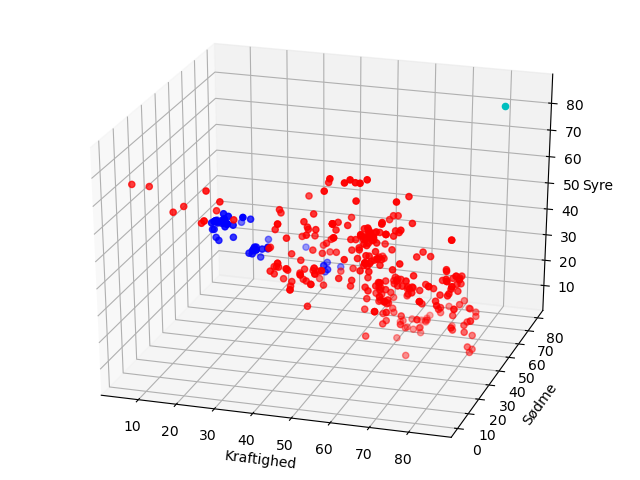

In [105]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random
import matplotlib.cm as cm
import itertools

df = pd.read_csv('RedWineWithNotes.csv')
dfRose = pd.read_csv('vinDataWithNotes.csv')

appended = df.append(dfRose, ignore_index=True)
filt = appended['Boldness'] > 0
appended= appended[filt]

fig = pyplot.figure()
ax = Axes3D(fig)

colors = "rbcm"
types = appended.Winetype.unique()

for wine_type, c in zip(types, colors):
    mask = appended['Winetype'] == wine_type
    sequence_x = appended[mask]['Boldness']
    sequence_y = appended[mask]['Sweetness']
    sequence_z = appended[mask]['Acidity']
    ax.scatter(sequence_x, sequence_y, sequence_z, color=c)
    
ax.set_xlabel('Kraftighed')
ax.set_ylabel('Sødme')
ax.set_zlabel('Syre')
pyplot.show()
